### Create Your Own Linear Regression Model Using Python

In this notebook, I will walk you through linear regression model creation using Python.
My goal was **not** to write a beautiful or pythonic code, but to write a code that is 
easy to understand for a novice reader. 

1. First we create a dataset (X and Y) to work with, using random module of NumPy.
   We plot the data to understand the relationship between X and Y.
2. Then we standardize X and Y i.e. we find Z-scores.
3. We find Pearson's R value or correlation coefficient.
4. We find slope and intercept for linear regression model.
5. Finally, we use the estimated slope and intercept to plot X and Y along with the fit line. 

### 1. Create Dataset and Plot

In [1]:
import numpy as np

In [2]:
# create an array of 100 random numbers between 0 and 1
X = np.random.rand(100,1)
slope = 5
intercept = 4.8

# create a list of Y.
# Y's have values approximately = X * slope + intercept
# A small noise is added to Y's

Y = []
for x in X:
    noise_slope = 1 #+ np.random.rand()
    noise_inter = np.random.rand()
    y = x * slope * noise_slope + intercept + noise_inter
    Y.append(y)

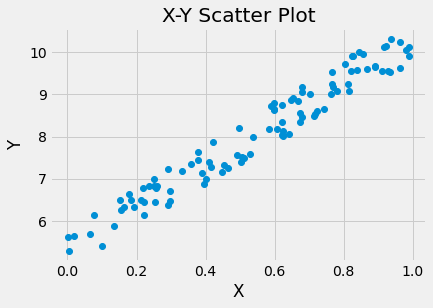

In [3]:
#Let's plot and see the relationship between X and Y.
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.plot(X, Y, 'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('X-Y Scatter Plot')
plt.show()

### 2. Standardization (Z value calculation)

In [4]:
X_mean = np.mean(X)
Y_mean = np.mean(Y)
X_std = np.std(X)
Y_std = np.std(Y)

X_mean, Y_mean, X_std, Y_std

(0.5444602692398799, 8.051171221486285, 0.2728474022389745, 1.3415503680591834)

In [5]:
X_Zvalues = (X - X_mean)/X_std
Y_Zvalues = (Y - Y_mean)/Y_std

In [6]:
print("Mean Z score:", np.mean(X_Zvalues))
print("Standard Deviation of Z scores", np.std(X_Zvalues))

Mean Z score: 2.55351295663786e-16
Standard Deviation of Z scores 0.9999999999999998


The mean Z is zero and standard deviation is 1, as expected of Z values. 
The small difference is due to rounding off error. 

### 3. Calculate Pearson's R

In [7]:
Pearson_R = (X_Zvalues * Y_Zvalues).sum()/len(X_Zvalues)
print("Correlation coefficient:",round(Pearson_R, 2))

Correlation coefficient: 0.97


Correlation coefficient of 0.98 indicates a strong positive correlation between X and Y.
This is of course expected since we created Y values using a linear equation and adding a small noice. 

### 4. Find Slope and Y-intercept

In [8]:
slope_regression = Pearson_R * Y_std/X_std
print("Slope used for data creation:", slope)
print("Slope estimated by linear model:",  round(slope_regression, 4), "\n")

intercept_regression = Y_mean - slope_regression * X_mean
print("Intercept used for data creation:",intercept)
print("Intercept estimated by linear model:", round(intercept_regression, 4))

Slope used for data creation: 5
Slope estimated by linear model: 4.7923 

Intercept used for data creation: 4.8
Intercept estimated by linear model: 5.4419


Note that, the small difference in slope and intercept is due to "noise" in data. 
We added some noise to the data to make it look a bit more realistic. 
Because of this, the actual slope and intercept would deviate slightly from the value we started from.

### 5. Plotting the  Linear Model

In [9]:
Y_pred = slope_regression  * X + intercept_regression

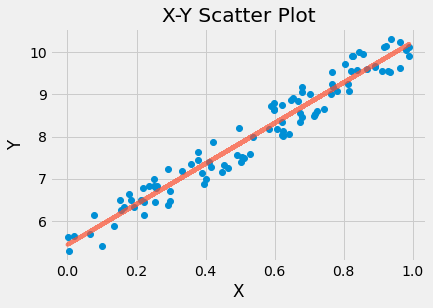

In [10]:
plt.plot(X, Y, 'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('X-Y Scatter Plot')
plt.plot(X, Y_pred, '-', alpha=0.7)
plt.show()